## LogNormal spectrum compared to Jonswap

In [13]:
from Snoopy import Spectral as sp
import numpy as np
from matplotlib import pyplot as plt

**Equivalence between LogNormal and Jonswap in terms of Goda's peakness**

For log-normal spectrum : $Q_p = \frac{1}{ \sqrt{\pi}\sigma_l}$

For Jonswap, no analytical expression exists, so numerical calculation is used (Spectrum.FromPeakness uses numerical solver)

In [31]:
hs = 1.
tp = 10.
sigma = 0.10

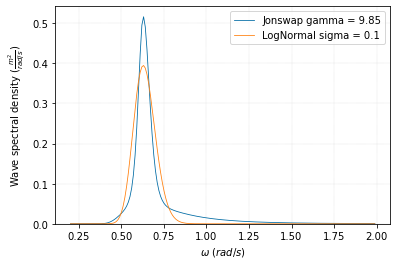

In [32]:
lognormal = sp.LogNormal( hs , tp , sigma) 
jonswap = sp.Jonswap.FromPeakness(hs , tp , sp.LogNormal.goda_from_sigma(sigma))

fig , ax = plt.subplots()
jonswap.plot(ax = ax, label = f"Jonswap gamma = {jonswap.gamma:.3g}") 
lognormal.plot(ax = ax, label = f"LogNormal sigma = {sigma:.3g}")
ax.legend()

Same process repeated for a range of $\sigma$

In [33]:
sigmaRange =  np.arange( 0.08 , 0.2 , 0.01)
gammaRange = [sp.Jonswap.FromPeakness(hs , tp , sp.LogNormal.goda_from_sigma(s)).gamma for s in sigmaRange ]

Text(0, 0.5, 'Gamma')

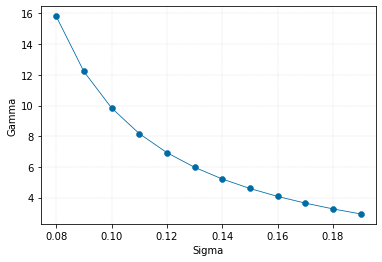

In [34]:
fig , ax = plt.subplots()
ax.plot( sigmaRange ,gammaRange , "o-")
ax.set_xlabel( "Sigma" )
ax.set_ylabel( "Gamma" )

**Approximating logNormal spectrum by Jonswap, using least-square**

In [35]:
lognormal = sp.LogNormal( hs , tp , sigma) 
fittedJonswap = lognormal.fitSpectrumShape( sp.Jonswap )

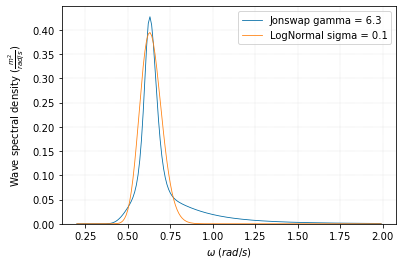

In [36]:
fig , ax = plt.subplots()
fittedJonswap.plot(ax = ax, label = f"Jonswap gamma = {fittedJonswap.gamma:.3g}") 
lognormal.plot(ax = ax, label = f"LogNormal sigma = {sigma:.3g}")
ax.legend()

Same process repeated for a range of $\sigma$

In [37]:
gammaRange2 = [ sp.LogNormal( 1.0 , 10. , sigma).fitSpectrumShape( sp.Jonswap ).gamma for sigma in sigmaRange]

Text(0, 0.5, 'Gamma')

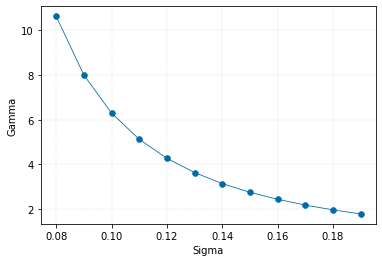

In [38]:
fig , ax = plt.subplots()
ax.plot( sigmaRange ,gammaRange2 , "o-" )
ax.set_xlabel( "Sigma" )
ax.set_ylabel( "Gamma" )

Note : this relationship is independent from Tp

Note 2 : Jonswap is limited to 15 in Snoopy

**Compare least-square and Goda's peakness equivalence**

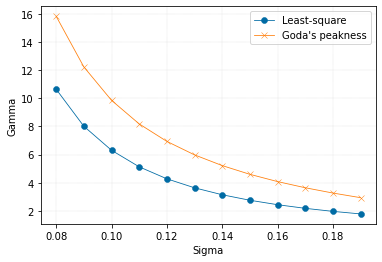

In [39]:
fig , ax = plt.subplots()
ax.plot( sigmaRange ,gammaRange2 , "o-", label = "Least-square" )
ax.plot( sigmaRange ,gammaRange , "x-" , label = "Goda's peakness" )
ax.set_xlabel( "Sigma" )
ax.set_ylabel( "Gamma" )
ax.legend()